<a href="https://colab.research.google.com/github/chewon03/origin/blob/main/Ybigta%20%EA%B3%BC%EC%A0%9C/%ED%86%B5%EA%B3%84%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [ ]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [ ]:
# train 데이터 불러오기
train = pd.read_csv('/content/gdrive/MyDrive/graduate_train.csv')

# train 데이터 크기 확인
train.shape

# train 데이터 훑어보기
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86


In [ ]:
# test 데이터 불러오기
test = pd.read_csv('/content/gdrive/MyDrive/graduate_test.csv')

# test 데이터 크기 확인
test.shape

# test 데이터 훑어보기
test.head()

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [ ]:
## TODO
train.isnull().sum()

test.isnull().sum()

(train.isnull().sum()/len(train)*100).sort_values(ascending=False)
(test.isnull().sum()/len(test)*100).sort_values(ascending=False)

Research             0.0
CGPA                 0.0
LOR                  0.0
SOP                  0.0
University Rating    0.0
TOEFL Score          0.0
GRE Score            0.0
dtype: float64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 없어요

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [ ]:
## TODO
train.info()
test.info()

train= pd.get_dummies(train, columns=['Research', 'University Rating'])
tes= pd.get_dummies(test, columns=['Research', 'University Rating'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          100 non-null    int64  
 1   TOEFL Score        100 non-null    int64  
 2   University Rating  100 non-null    int64  
 3   SOP  

Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. research. dummy데이터로 바꿔줘야한다

# 3. 선형(Linear) 회귀

In [ ]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = train.drop('Chance of Admit', axis=1)
y = train['Chance of Admit']

In [ ]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 12)
training response size: (320,)
test predictors size: (80, 12)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
linear = LinearRegression()

# 2. 모델을 적합시킵니다.
## TODO
linear.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % linear.score(X_train, y_train))

Training R^2: 0.83


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = linear.predict(X_test)
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0041
Variance score: 0.7667


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [ ]:
## TODO
print("intercept:", linear.intercept_)

intercept: -1.2334927078877307


Q. 절편 계수의 의미는 무엇인가요?  
A. 독립변수의 값이 모두 0일때 합격률

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [ ]:
## TODO
beta = pd.DataFrame(linear.coef_, index=X.columns, columns=["slope"])
beta.sort_values("slope")

,slope
Research_No,-0.013355
University Rating_2,-0.009994
University Rating_4,-0.008298
University Rating_3,0.000305
GRE Score,0.001584
TOEFL Score,0.003738
University Rating_1,0.006344
SOP,0.008319
University Rating_5,0.011643
Research_Yes,0.013355


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

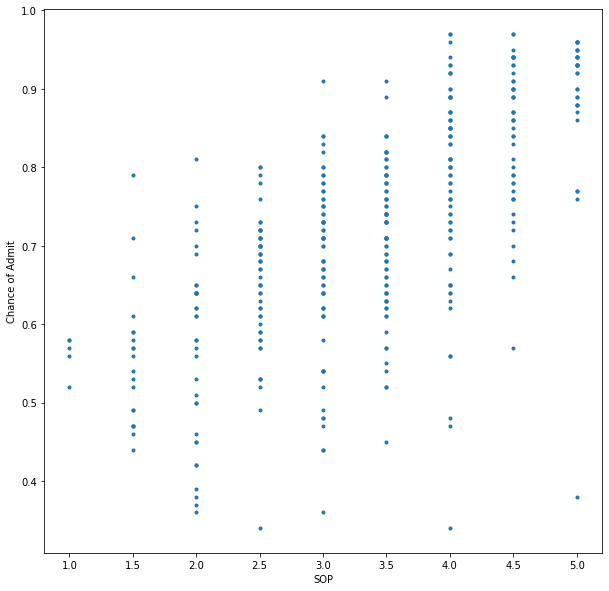

In [ ]:
## TODO
plt.figure(figsize=(10,10))
plt.plot(train['SOP'], train['Chance of Admit'], 'o', ms=3)
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')
plt.show()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

[]

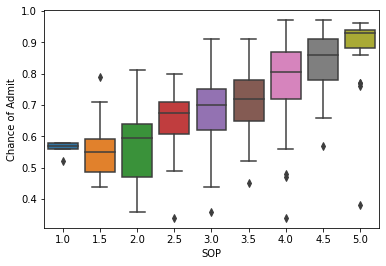

In [ ]:
## TODO
sns.boxplot(x="SOP", y="Chance of Admit", data=train)
plt.plot()

### 3.2. StatsModels로 선형 회귀 시행하기

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     149.3
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          6.03e-112
Time:                        07:04:37   Log-Likelihood:                 451.49
No. Observations:                 320   AIC:                            -881.0
Df Residuals:                     309   BIC:                            -839.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
GRE Score               0.0016      0.001      2.484      0.014       0.000       0.003
TOEFL Score             0.0037      0.001      3.272      0.001       0.001       0.006
SOP                     0.0083      0.006      1.455      0.147      -0.003       0.020
LOR                     0.0167      0.005      3.257      0.001       0.007       0.027
CGPA                    0.1126      0.012      9.280      0.000       0.089       0.136
Research_No            -0.8944      0.097     -9.184      0.000      -1.086      -0.703
Research_Yes           -0.8677      0.101     -8.626      0.000      -1.066      -0.670
University Rating_1    -0.3461      0.039     -8.905      0.000      -0.423      -0.270
University Rating_2    -0.3624      0.039     -9.393      0.000      -0.438      -0.286
University Rating_3    -0.3521      0.039     -8.949      0.000      -0.430      -0.275
University Rating_4    -0.3607      0.042     -8.594      0.000      -0.443      -0.278
University Rating_5    -0.3408      0.044     -7.731      0.000      -0.428      -0.254
==============================================================================
Omnibus:                       67.371   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.759
Skew:                          -1.042   Prob(JB):                     1.11e-33
Kurtosis:                       5.653   Cond. No.                     4.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
## TODO

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. 네. r^2값은 0.8 정도로 설명력이 높다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. p-value값을 보면 유의수준 0.05보다 작으므로 귀무가설을 기각한다고 볼 수 있고 이는 합격률에 영향을 미친다고 볼 수 있다. 

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [ ]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
ridge = RidgeCV(alphas=(0.1,1,10))

# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % ridge.score(X_train, y_train))

Training R^2: 0.83


In [ ]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso = LassoCV(alphas=(0.1,1,10))

# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % lasso.score(X_train, y_train))

Training R^2: 0.69
